In [1]:
#Cell_1.
import pandas as pd 
import numpy as np
df = pd.read_csv('bp3.csv',sep=",",header=0)
display(df.head())

,ID,blood_pressure_before,blood_pressure_after,age,gender,treatment_period,weight
0,1,150,135,45,M,3,80
1,2,145,138,34,F,1,65
2,3,160,150,60,M,2,85
3,4,155,140,50,F,3,72
4,5,149,136,40,M,2,78


In [2]:
#Cell_2.
df2=df.copy()
df2['decrease']=df['blood_pressure_before']-df['blood_pressure_after']
df2[['decrease','age','weight','treatment_period']].corr()

,decrease,age,weight,treatment_period
decrease,1.000000,-0.107591,-0.119405,0.761537
age,-0.107591,1.000000,0.814432,-0.272129
weight,-0.119405,0.814432,1.000000,-0.328641
treatment_period,0.761537,-0.272129,-0.328641,1.000000


<Axes: xlabel='treatment_period', ylabel='decrease'>

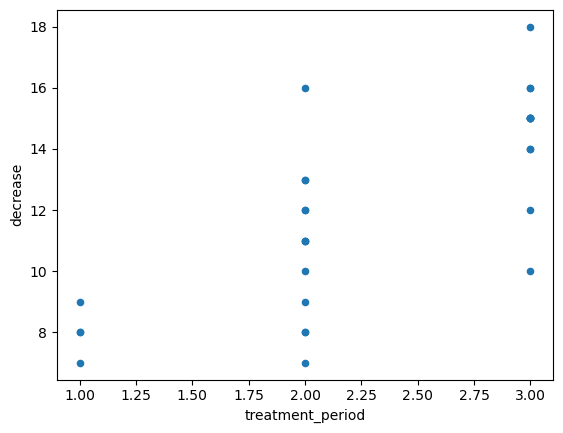

In [3]:
#Cell_3.
df2[['treatment_period','decrease']].plot(kind='scatter',x='treatment_period',y='decrease')

<Axes: xlabel='age', ylabel='blood_pressure_before'>

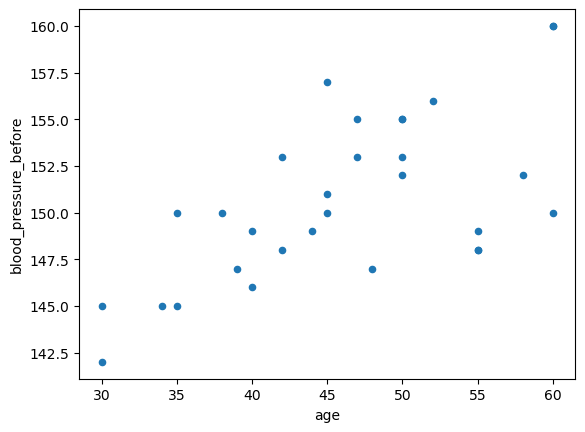

In [4]:
#Cell_4.
df[['age','blood_pressure_before']].plot(kind='scatter',x='age',y='blood_pressure_before')

In [5]:
#Cell_5.
import scipy
from scipy import linalg

def cor2pcor(R):
    inv_cor = linalg.inv(R)
    rows = inv_cor.shape[0]
    regu_1 = 1 / np.sqrt(np.diag(inv_cor))
    regu_2 = np.repeat(regu_1, rows).reshape(rows, rows)
    pcor = (-inv_cor) * regu_1 * regu_2
    np.fill_diagonal(pcor, 1)
    return pcor
    
df3=df2[['decrease','age','weight','treatment_period']]
pcor = pd.DataFrame(cor2pcor(df3.corr()), columns=df3.corr().columns, index=df3.corr().index)
display(pcor)

,decrease,age,weight,treatment_period
decrease,1.000000,-0.018296,0.145038,0.770289
age,-0.018296,1.000000,0.791830,0.008889
weight,0.145038,0.791830,1.000000,-0.232643
treatment_period,0.770289,0.008889,-0.232643,1.000000


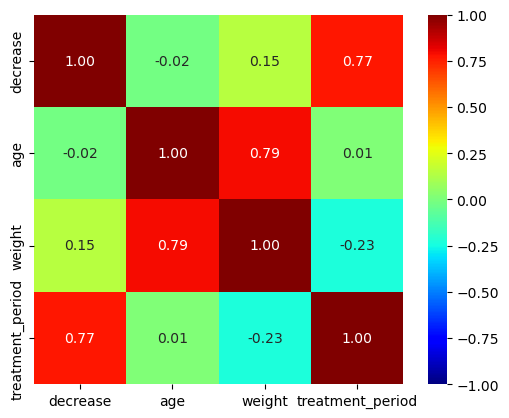

In [6]:
%matplotlib inline
#Cell_6.
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(pcor, annot=True, square=True, vmin=-1, vmax=1, fmt=".2f", cmap="jet")
plt.show()